## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-05-12,2055.000000,2215.610107,2048.110107,2138.610107,2138.610107,6601300,AMAZON
2022-05-13,2181.379883,2263.679932,2156.000000,2261.100098,2261.100098,4676700,AMAZON
2022-05-16,2262.000000,2279.850098,2207.080078,2216.209961,2216.209961,3728300,AMAZON
2022-05-17,2265.500000,2316.000000,2225.530029,2307.370117,2307.370117,3822400,AMAZON
2022-05-18,2228.790039,2257.060059,2125.330078,2142.250000,2142.250000,5321433,AMAZON


## Descriptive statistics about data

In [3]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,154.471575,156.251024,152.826417,154.595118,154.096297,8.773691e+07
std,14.834634,15.161053,14.419372,14.795659,14.925305,2.647704e+07
min,123.160004,124.849998,122.860001,123.540001,122.838203,4.100000e+07
25%,145.139999,146.867496,144.027500,145.639999,145.000195,6.904842e+07
50%,151.735001,154.375000,150.270004,151.945000,151.532249,8.299690e+07
75%,167.457497,169.654995,165.384998,166.524998,166.280693,1.007677e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,1.954327e+08


In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-05-18 to 2022-05-18
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          254 non-null    float64
 1   High          254 non-null    float64
 2   Low           254 non-null    float64
 3   Close         254 non-null    float64
 4   Adj Close     254 non-null    float64
 5   Volume        254 non-null    int64  
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


## Historical view of the closing price

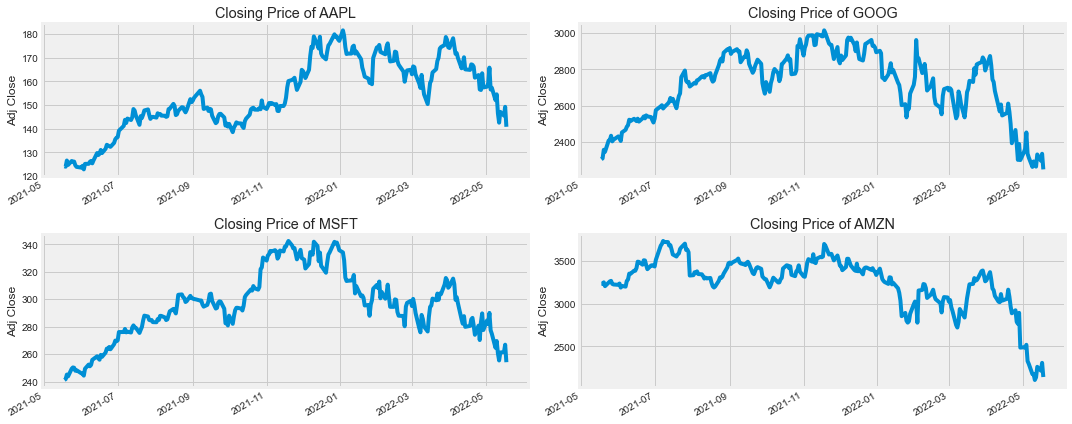

In [5]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Moving average of stocks

In [6]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

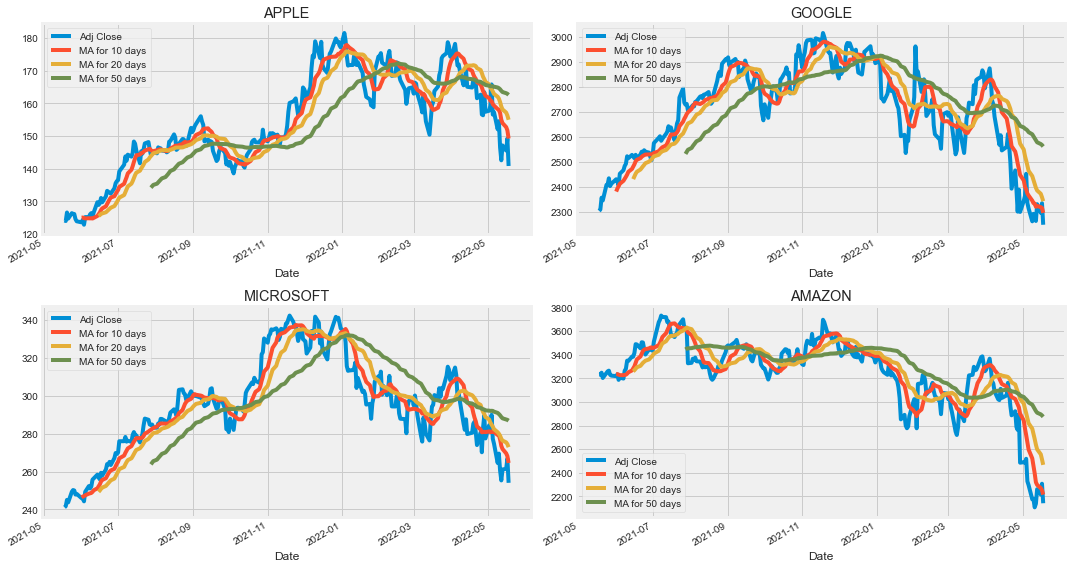

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Predicting the closing price stock price of APPLE inc

In [8]:
# Get the stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557462
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624951
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765114
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898557
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878095
...,...,...,...,...,...,...
2022-05-12,146.199997,138.800003,142.770004,142.559998,182602000.0,142.559998
2022-05-13,148.100006,143.110001,144.589996,147.110001,113787000.0,147.110001
2022-05-16,147.520004,144.179993,145.550003,145.539993,86643800.0,145.539993


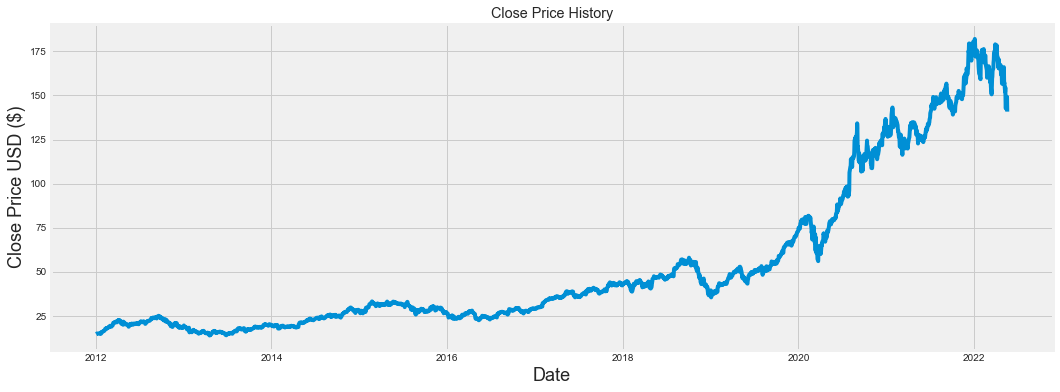

In [9]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [10]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2482

In [11]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data


array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.78299738],
       [0.80501307],
       [0.75491267]])

In [12]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=2, epochs=2)

Epoch 1/2
1211/1211 [==============================] - 36s 26ms/step - loss: 7.2463e-04
Epoch 2/2
1211/1211 [==============================] - 36s 29ms/step - loss: 6.9694e-04


In [19]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 21ms/step


6.428879399056011

C:\Users\admin\AppData\Local\Temp\ipykernel_3264\2388977846.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


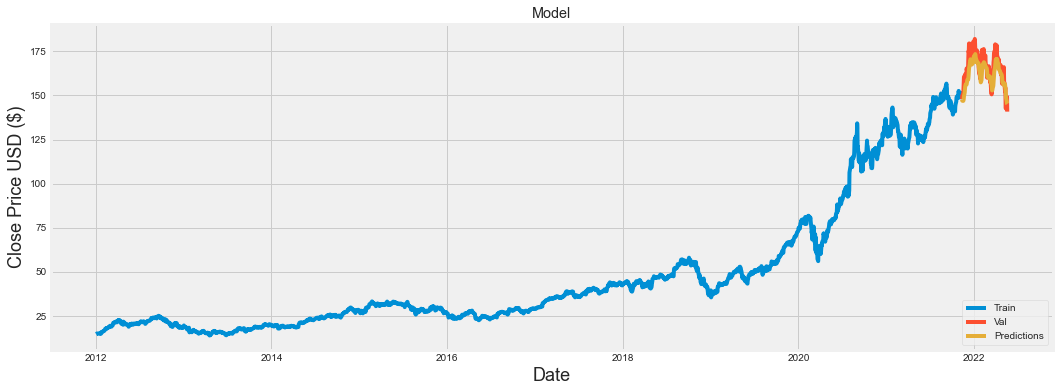

In [20]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
valid


,Close,Predictions
Date,,
2021-11-11,147.869995,147.621124
2021-11-12,149.990005,147.024887
2021-11-15,150.000000,146.877457
2021-11-16,151.000000,146.921509
2021-11-17,153.490005,147.216034
...,...,...
2022-05-12,142.559998,151.256622
2022-05-13,147.110001,148.391006
2022-05-16,145.539993,146.643021
